In [1]:
#importing libraries
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime, timedelta
from matplotlib import dates as mpl_dates
from tensorflow.keras.layers import Input, LSTM, GRU, SimpleRNN, Dense, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow import keras

np.random.seed(1)


In [2]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
#loading dataset
df=pd.read_csv('/Users/pamel/Downloads/Tesla.csv', index_col='Date', parse_dates=True, dayfirst=True)
data = df.copy()

data.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,42.972000,44.066002,42.192001,43.397999,43.397999,29616500
2017-01-04,42.950001,45.599998,42.862000,45.397999,45.397999,56067500
2017-01-05,45.284000,45.495998,44.389999,45.349998,45.349998,29558500
2017-01-06,45.386002,46.062000,45.090000,45.801998,45.801998,27639500
2017-01-09,45.793999,46.383999,45.599998,46.256001,46.256001,19897500


In [4]:
data.shape

(1259, 6)

In [5]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
#Data information (data as a string)

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2017-01-03 to 2021-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1259 non-null   float64
 1   High       1259 non-null   float64
 2   Low        1259 non-null   float64
 3   Close      1259 non-null   float64
 4   Adj Close  1259 non-null   float64
 5   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.9 KB


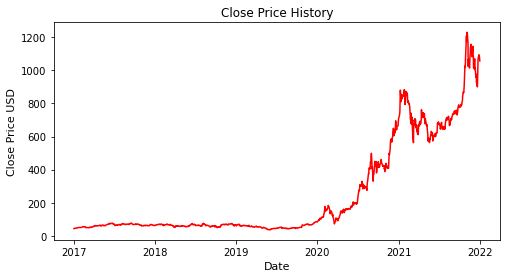

In [7]:
#plotting the data to chech

plt.figure(figsize=(8,4))
plt.title('Close Price History')
plt.plot(data['Adj Close'], color='red')
plt.xlabel('Date', fontsize=11)
plt.ylabel('Close Price USD', fontsize = 11)
plt.show()

In [8]:
# calculate returns by first shifting the data - Lag Difference
data['PrevClose'] = data['Adj Close'].shift(1)

In [9]:
# then the return is

data['Return'] = (data['Adj Close'] - data['PrevClose']) / data['PrevClose']
data

,Open,High,Low,Close,Adj Close,Volume,PrevClose,Return
Date,,,,,,,,
2017-01-03,42.972000,44.066002,42.192001,43.397999,43.397999,29616500,NaN,NaN
2017-01-04,42.950001,45.599998,42.862000,45.397999,45.397999,56067500,43.397999,0.046085
2017-01-05,45.284000,45.495998,44.389999,45.349998,45.349998,29558500,45.397999,-0.001057
2017-01-06,45.386002,46.062000,45.090000,45.801998,45.801998,27639500,45.349998,0.009967
2017-01-09,45.793999,46.383999,45.599998,46.256001,46.256001,19897500,45.801998,0.009912
...,...,...,...,...,...,...,...,...
2021-12-27,1073.670044,1117.000000,1070.719971,1093.939941,1093.939941,23715300,1067.000000,0.025248
2021-12-28,1109.489990,1119.000000,1078.420044,1088.469971,1088.469971,20108000,1093.939941,-0.005000
2021-12-29,1098.640015,1104.000000,1064.140015,1086.189941,1086.189941,18718000,1088.469971,-0.002095


<AxesSubplot:>

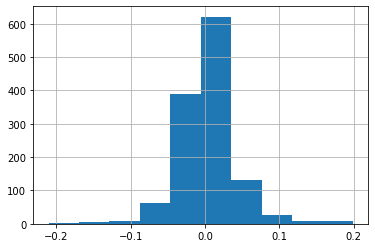

In [10]:

data['Return'].hist()

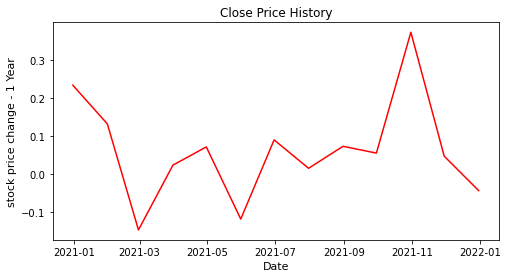

In [11]:
#plotting the return stock price 1 Year
df_plot = data['2020-12-01':'2021-12-01'].resample('M').sum()
plt.figure(figsize=(8,4))
plt.title('Close Price History')
plt.plot(df_plot['Return'], color='red')
plt.xlabel('Date', fontsize=11)
plt.ylabel('stock price change - 1 Year', fontsize = 11)
plt.show()

In [12]:
# sort by date
data = data.sort_values('Date')


data.tail()

,Open,High,Low,Close,Adj Close,Volume,PrevClose,Return
Date,,,,,,,,
2021-12-27,1073.670044,1117.000000,1070.719971,1093.939941,1093.939941,23715300,1067.000000,0.025248
2021-12-28,1109.489990,1119.000000,1078.420044,1088.469971,1088.469971,20108000,1093.939941,-0.005000
2021-12-29,1098.640015,1104.000000,1064.140015,1086.189941,1086.189941,18718000,1088.469971,-0.002095
2021-12-30,1061.329956,1095.550049,1053.150024,1070.339966,1070.339966,15680300,1086.189941,-0.014592
2021-12-31,1073.439941,1082.000000,1054.589966,1056.780029,1056.780029,13528700,1070.339966,-0.012669


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2017-01-03 to 2021-12-31
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1259 non-null   float64
 1   High       1259 non-null   float64
 2   Low        1259 non-null   float64
 3   Close      1259 non-null   float64
 4   Adj Close  1259 non-null   float64
 5   Volume     1259 non-null   int64  
 6   PrevClose  1258 non-null   float64
 7   Return     1258 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 88.5 KB


In [14]:
#Fixing the data type

data = data.astype({"Open":"float32","High":"float32","Low":"float32",
                    "Close":"float32","Adj Close":"float32","Volume":"float32"})

In [15]:
#Selecting the data 

data_to_use = data['Adj Close'].values

print('Total number of days in the dataset: {}'.format(len(data_to_use)))

Total number of days in the dataset: 1259


In [16]:
# Normalizying the data
sc = MinMaxScaler(feature_range = (0, 1))

series = sc.fit_transform(data_to_use.reshape(-1, 1))
series.shape

(1259, 1)

In [17]:
#Selecting the data to be used 

T = data['Adj Close'].values
T = T.astype('float32')
T = np.reshape(T, (-1, 1))

In [18]:
#Normalization 

scaler = MinMaxScaler(feature_range = (0, 1))
T = scaler.fit_transform(T)

# 65% of the data is for training, 35% for testing since small data
train_size = int(len(T) * 0.65)
test_size = int(len(T) - train_size)
train, test = T[0:train_size,:], T[train_size:len(T),:]

In [19]:
# Creatying the features from the time series data 
def create_features(data, window_size):
    X, Y = [], []
    for i in range(len(data) - window_size - 1):
        window = data[i:(i + window_size), 0]
        X.append(window)
        Y.append(data[i + window_size, 0])
    return np.array(X), np.array(Y)

# Roughly one month of trading assuming 5 trading days per week
window_size = 20
X_train, Y_train = create_features(train, window_size)

X_test, Y_test = create_features(test, window_size)

# Reshape to the format of [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))

X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [20]:
# Checking the data 
T_shape = T.shape
train_shape = train.shape
test_shape = test.shape

# Make sure that the number of rows in the dataset = train rows + test rows
def isLeak(T_shape, train_shape, test_shape):
    return not(T_shape[0] == (train_shape[0] + test_shape[0]))

print(isLeak(T_shape, train_shape, test_shape))

False


In [21]:
import tensorflow as tf
tf.random.set_seed(11)
np.random.seed(11)

In [22]:
# Creating the model and setting parameters
inputs = keras.layers.Input(shape=(X_train.shape[1], window_size))
x = keras.layers.LSTM(60, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.LSTM(60, return_sequences=True)(x)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.LSTM(60)(x)
outputs = keras.layers.Dense(1, activation='linear')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam', loss="mse")

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 20)]           0         
                                                                 
 lstm (LSTM)                 (None, 1, 60)             19440     
                                                                 
 dropout (Dropout)           (None, 1, 60)             0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 60)             29040     
                                                                 
 dropout_1 (Dropout)         (None, 1, 60)             0         
                                                                 
 lstm_2 (LSTM)               (None, 60)                29040     
                                                                 
 dense (Dense)               (None, 1)                 61    

In [23]:
#Fitting and predicting the model
history = model.fit(X_train, Y_train, epochs = 100, batch_size = 20, validation_data = (X_test, Y_test), verbose = 1, shuffle = False)

model.summary()

Epoch 1/100
40/40 [==============================] - 8s 52ms/step - loss: 4.2083e-04 - val_loss: 0.2576
Epoch 2/100
40/40 [==============================] - 0s 11ms/step - loss: 4.2492e-04 - val_loss: 0.2547
Epoch 3/100
40/40 [==============================] - 0s 11ms/step - loss: 4.2578e-04 - val_loss: 0.2551
Epoch 4/100
40/40 [==============================] - 0s 11ms/step - loss: 3.9797e-04 - val_loss: 0.2451
Epoch 5/100
40/40 [==============================] - 0s 11ms/step - loss: 3.6531e-04 - val_loss: 0.2242
Epoch 6/100
40/40 [==============================] - 0s 11ms/step - loss: 3.1183e-04 - val_loss: 0.1778
Epoch 7/100
40/40 [==============================] - 0s 11ms/step - loss: 2.1006e-04 - val_loss: 0.0973
Epoch 8/100
40/40 [==============================] - 0s 10ms/step - loss: 1.0676e-04 - val_loss: 0.0334
Epoch 9/100
40/40 [==============================] - 0s 8ms/step - loss: 7.7086e-05 - val_loss: 0.0211
Epoch 10/100
40/40 [==============================] - 0s 8ms/step

Epoch 80/100
40/40 [==============================] - 0s 7ms/step - loss: 3.7150e-05 - val_loss: 0.0787
Epoch 81/100
40/40 [==============================] - 0s 8ms/step - loss: 4.7042e-05 - val_loss: 0.0585
Epoch 82/100
40/40 [==============================] - 0s 9ms/step - loss: 4.1294e-05 - val_loss: 0.0857
Epoch 83/100
40/40 [==============================] - 0s 7ms/step - loss: 5.0522e-05 - val_loss: 0.0603
Epoch 84/100
40/40 [==============================] - 0s 7ms/step - loss: 4.9587e-05 - val_loss: 0.0896
Epoch 85/100
40/40 [==============================] - 0s 7ms/step - loss: 5.0280e-05 - val_loss: 0.0605
Epoch 86/100
40/40 [==============================] - 0s 7ms/step - loss: 3.1916e-05 - val_loss: 0.0799
Epoch 87/100
40/40 [==============================] - 0s 8ms/step - loss: 3.4632e-05 - val_loss: 0.0622
Epoch 88/100
40/40 [==============================] - 0s 7ms/step - loss: 3.2415e-05 - val_loss: 0.0830
Epoch 89/100
40/40 [==============================] - 0s 8ms/ste

In [24]:
# inverse scale

train_predict = model.predict(X_train)

Y_hat_train = scaler.inverse_transform(train_predict)

test_predict = model.predict(X_test)

Y_hat_test = scaler.inverse_transform(test_predict)

Y_test = scaler.inverse_transform([Y_test])
Y_train = scaler.inverse_transform([Y_train])

In [25]:
Y_hat_train.shape


(797, 1)

In [26]:
#reshapying the data back 

Y_hat_train = np.reshape(Y_hat_train, newshape = 797)
Y_hat_test = np.reshape(Y_hat_test, newshape = 420)

Y_train = np.reshape(Y_train, newshape = 797)
Y_test = np.reshape(Y_test, newshape = 420)

In [27]:
#Calculating the RMSE

train_RMSE = np.sqrt(mean_squared_error(Y_train, Y_hat_train))

test_RMSE = np.sqrt(mean_squared_error(Y_test, Y_hat_test))

print('Train RMSE is: ')
print(train_RMSE, '\n')
print('Test RMSE is: ')
print(test_RMSE)

Train RMSE is: 
6.095877066221136 

Test RMSE is: 
333.8995114096477


In [28]:
Y = np.append(Y_train, Y_test)
Y_hat = np.append(Y_hat_train, Y_hat_test)

In [29]:
result_df = pd.DataFrame()

result_df['Actual_Y'] = Y
result_df['Predicted_Y'] = Y_hat


result_df.head()

,Actual_Y,Predicted_Y
0,49.847999,56.282558
1,50.309999,56.147476
2,50.266000,56.194241
3,51.554002,56.248547
4,51.495999,56.582115


Text(0, 0.5, 'Value of Tesla Stock')

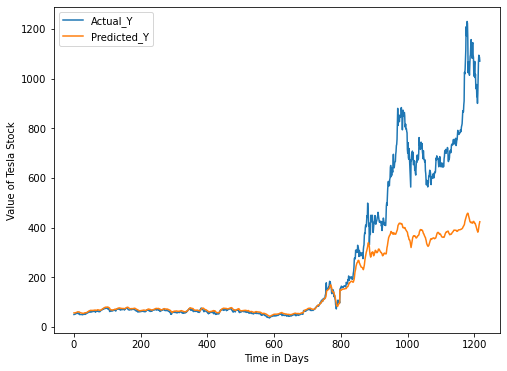

In [30]:
#ploting the results

result_df.plot(figsize=(8,6))
plt.xlabel('Time in Days')
plt.ylabel('Value of Tesla Stock')